In [270]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [271]:
df = pd.read_csv(R"merged_file.csv")
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,1076.0,4.18,1.0,0.0,0,13.500,0.0,0
1,429.0,1.48,4.0,0.0,0,13.500,0.0,0
2,856.0,4.15,1.0,0.0,24,6.000,0.0,0
3,622.0,3.22,1.0,0.0,15,5.625,0.0,0
4,507.0,3.98,1.0,0.0,0,2.250,0.0,0


Dataset :
⏱️ 'trip_duration': How long did the journey last?[in Seconds]

🛣️ 'distance_traveled': How far did the taxi travel?[in Km]

🧑‍🤝‍🧑 'num_of_passengers': How many passengers were in the taxi?

💵 'fare': What's the base fare for the journey?[In INR]

💲 'tip': How much did the driver receive in tips?[In INR]

🎀 'miscellaneous_fees': Were there any additional charges during the trip?e.g. tolls, convenience fees, GST
etc.[In INR]

💰 'total_fare': The grand total for the ride (this is your prediction target!).[In INR]

⚡ 'surge_applied': Was there a surge pricing applied? Yes or no?


In [272]:
df.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299534 entries, 0 to 299533
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       299534 non-null  float64
 1   distance_traveled   299534 non-null  float64
 2   num_of_passengers   299534 non-null  float64
 3   fare                299534 non-null  float64
 4   tip                 299534 non-null  int64  
 5   miscellaneous_fees  299534 non-null  float64
 6   total_fare          299534 non-null  float64
 7   surge_applied       299534 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 18.3 MB


In [274]:
df.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,299534.000000,299534.000000,299534.000000,299534.000000,299534.000000,299534.000000,299534.000000,299534.000000
mean,1165.680417,5.717167,1.290985,69.736136,13.030891,15.152971,89.453417,0.281050
std,4727.006306,321.516385,0.927814,84.933388,19.880049,12.590909,101.301805,0.449513
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,0.000000,0.000000,6.000000,0.000000,0.000000
50%,706.000000,3.200000,1.000000,56.250000,9.000000,9.750000,74.700000,0.000000
75%,1097.000000,5.730000,1.000000,93.750000,20.000000,26.450000,126.000000,1.000000
max,86395.000000,145517.600000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


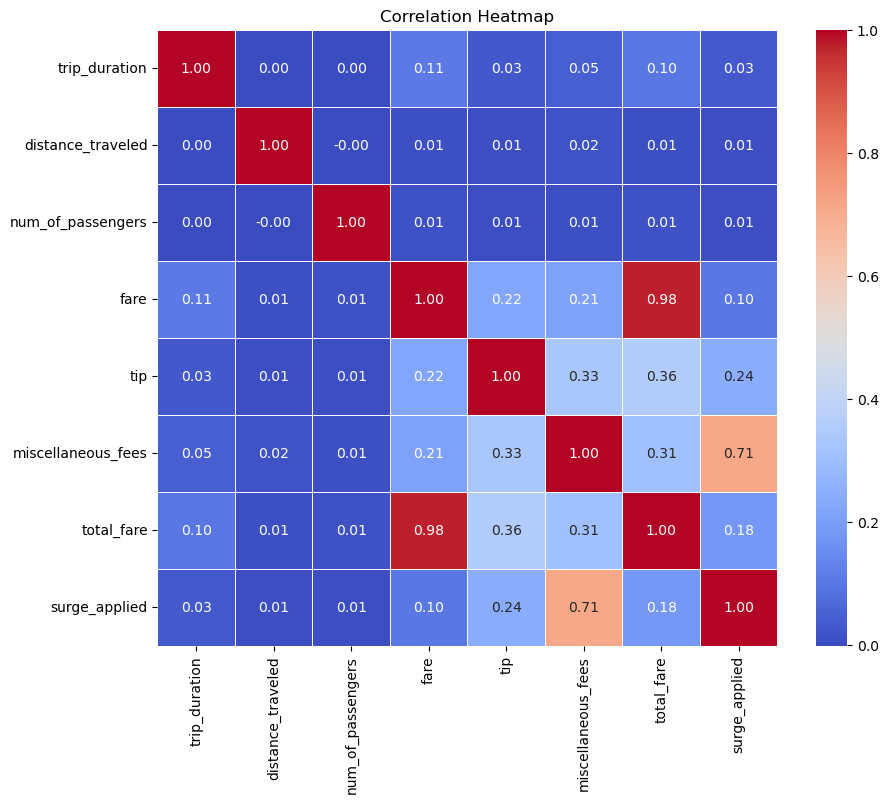

In [275]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [276]:
df = df[df['fare'] != 0]
df = df[df['trip_duration'] != 0]
df = df[df['num_of_passengers'] != 0]


In [277]:
df["surge_applied"].value_counts()

0    150209
1     58532
Name: surge_applied, dtype: int64

In [278]:
df.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,208741.000000,208741.000000,208741.000000,208741.000000,208741.000000,208741.000000,208741.000000,208741.000000
mean,1173.905409,5.053462,1.297546,99.715234,13.031503,15.138484,127.885221,0.280405
std,4784.487110,125.495214,0.929475,85.563899,20.338519,12.542558,98.725862,0.449198
min,1.000000,0.020000,1.000000,0.075000,0.000000,-0.500000,1.125000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.220000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


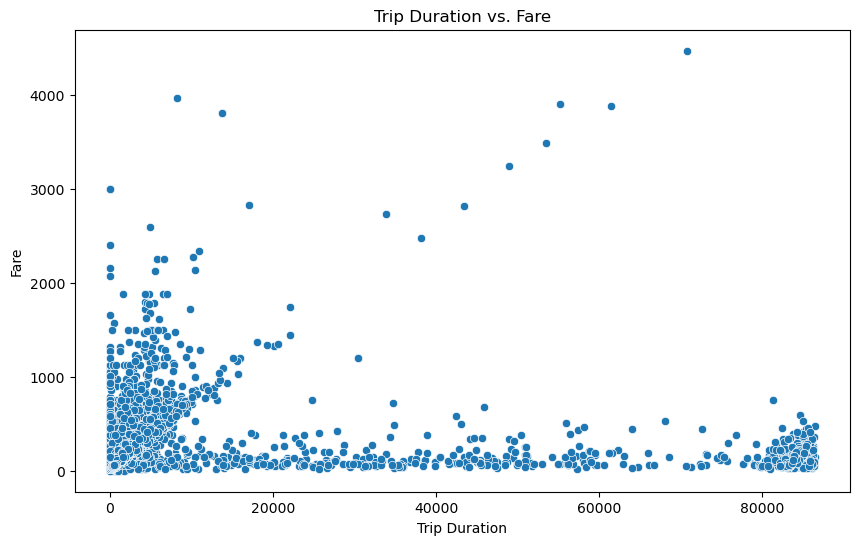

In [279]:
plt.figure(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(x='trip_duration', y='fare', data=df)
plt.title('Trip Duration vs. Fare')
plt.xlabel('Trip Duration')
plt.ylabel('Fare')
plt.show()

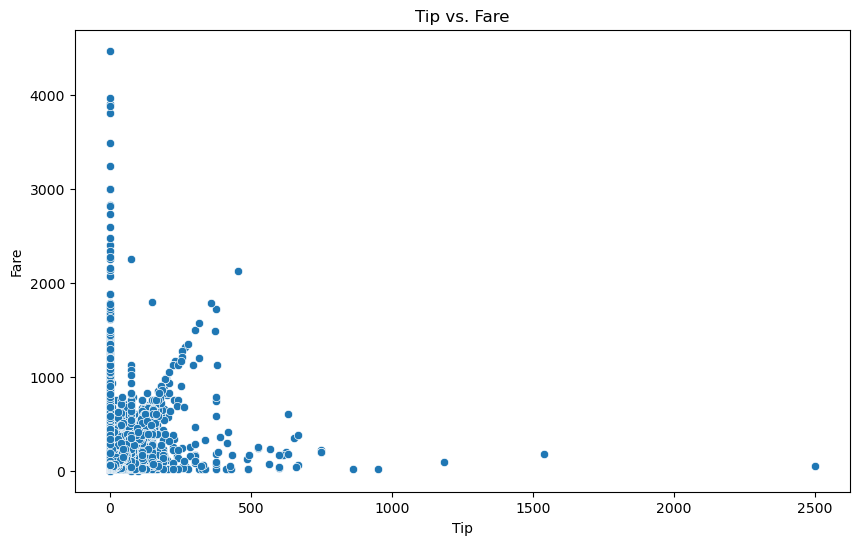

In [280]:
plt.figure(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(x='tip', y='fare', data=df)
plt.title('Tip vs. Fare')
plt.xlabel('Tip')
plt.ylabel('Fare')
plt.show()

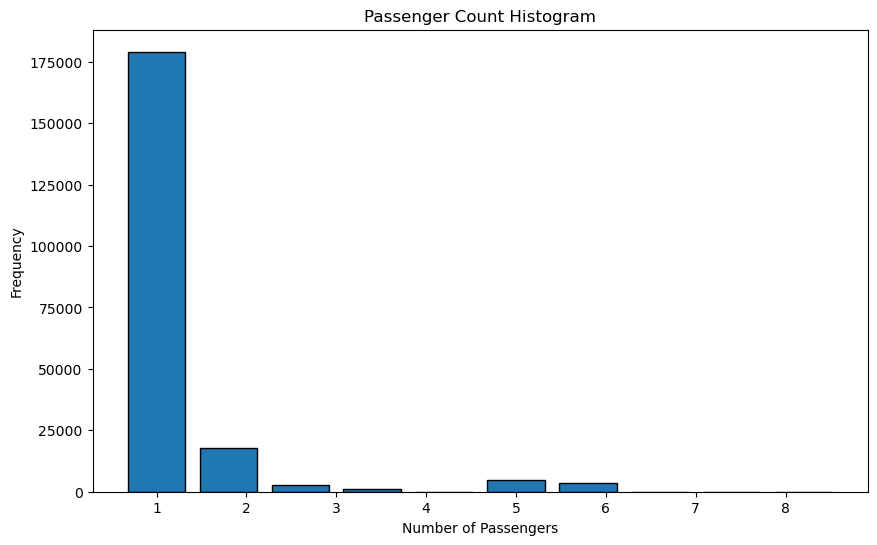

In [281]:
# Create the histogram
plt.figure(figsize=(10, 6))  # Set the figsize for the histogram
plt.hist(df['num_of_passengers'], align='left', rwidth=0.8, edgecolor='black')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.title('Passenger Count Histogram')
plt.show()

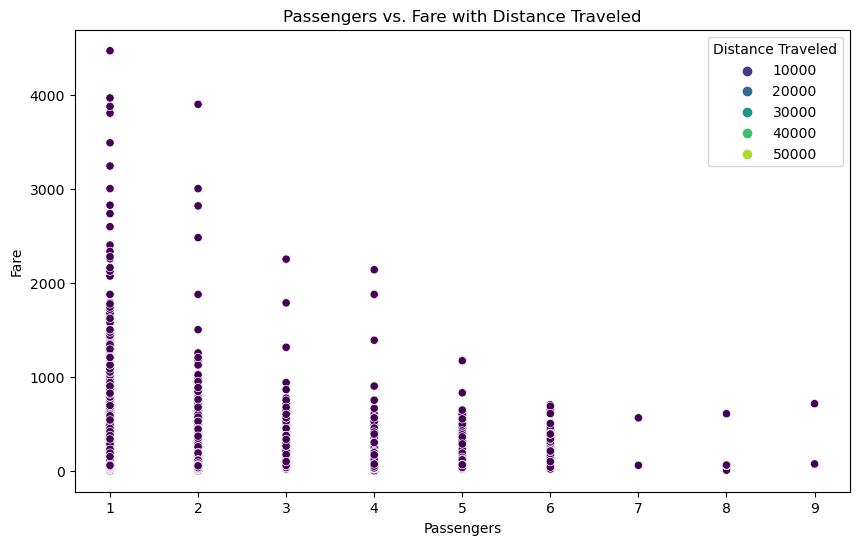

In [282]:
plt.figure(figsize=(10, 6))

# Create the scatter plot with 'distance_traveled' as the hue
sns.scatterplot(x='num_of_passengers', y='fare', hue='distance_traveled', data=df, palette='viridis')
plt.title('Passengers vs. Fare with Distance Traveled')
plt.xlabel('Passengers')
plt.ylabel('Fare')
plt.legend(title='Distance Traveled', loc='upper right')
plt.show()

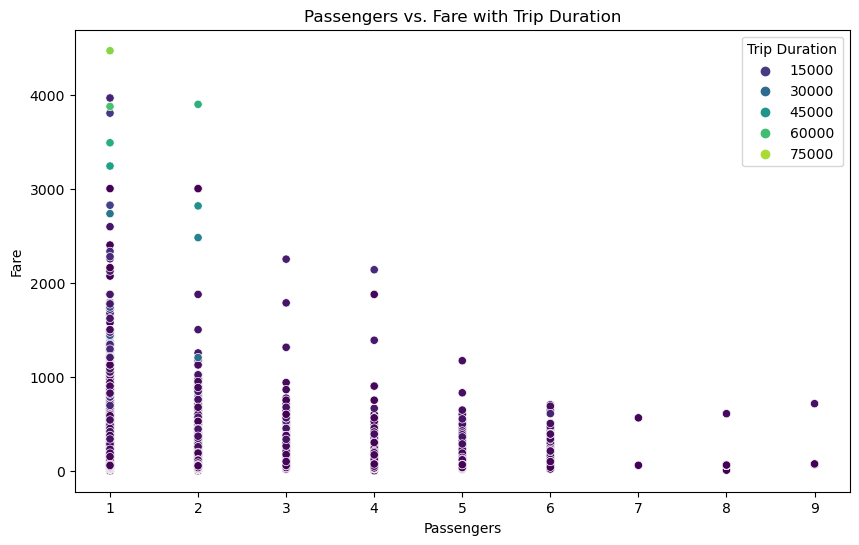

In [283]:
plt.figure(figsize=(10, 6))

# Create the scatter plot with 'distance_traveled' as the hue
sns.scatterplot(x='num_of_passengers', y='fare', hue='trip_duration', data=df, palette='viridis')
plt.title('Passengers vs. Fare with Trip Duration')
plt.xlabel('Passengers')
plt.ylabel('Fare')
plt.legend(title='Trip Duration', loc='upper right')
plt.show()

In [284]:
df = df.drop('num_of_passengers', axis=1)
df.head()

,trip_duration,distance_traveled,fare,tip,miscellaneous_fees,total_fare,surge_applied
89861,748.0,2.75,75.00,24,6.300,105.300,0
89862,1187.0,3.43,105.00,24,13.200,142.200,0
89863,730.0,3.12,71.25,0,26.625,97.875,1
89864,671.0,5.63,90.00,0,9.750,99.750,0
89865,329.0,2.09,45.00,12,13.200,70.200,0


In [285]:
df = df.reset_index(drop=True)
df.head()

,trip_duration,distance_traveled,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,75.00,24,6.300,105.300,0
1,1187.0,3.43,105.00,24,13.200,142.200,0
2,730.0,3.12,71.25,0,26.625,97.875,1
3,671.0,5.63,90.00,0,9.750,99.750,0
4,329.0,2.09,45.00,12,13.200,70.200,0


In [286]:
# Define a function to remove outliers from a specific column
def remove_outliers(df, column_name):
    if df[column_name].dtype in ['int64', 'float64'] and len(df[column_name].unique()) > 2:
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    else:
        # For binary categorical columns or other non-numeric columns, return the original DataFrame without filtering
        return df

# List of column names in the DataFrame
columns_to_remove_outliers=["trip_duration", "distance_traveled", "fare", "total_fare"]

# Iterate through each column and remove outliers for numerical columns
for column in columns_to_remove_outliers:
    df = remove_outliers(df, column)

# Now, the DataFrame 'df' will not contain the rows with outliers in any numerical column
# Binary categorical columns are preserved in the DataFrame


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177528 entries, 0 to 208739
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       177528 non-null  float64
 1   distance_traveled   177528 non-null  float64
 2   fare                177528 non-null  float64
 3   tip                 177528 non-null  int64  
 4   miscellaneous_fees  177528 non-null  float64
 5   total_fare          177528 non-null  float64
 6   surge_applied       177528 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 10.8 MB


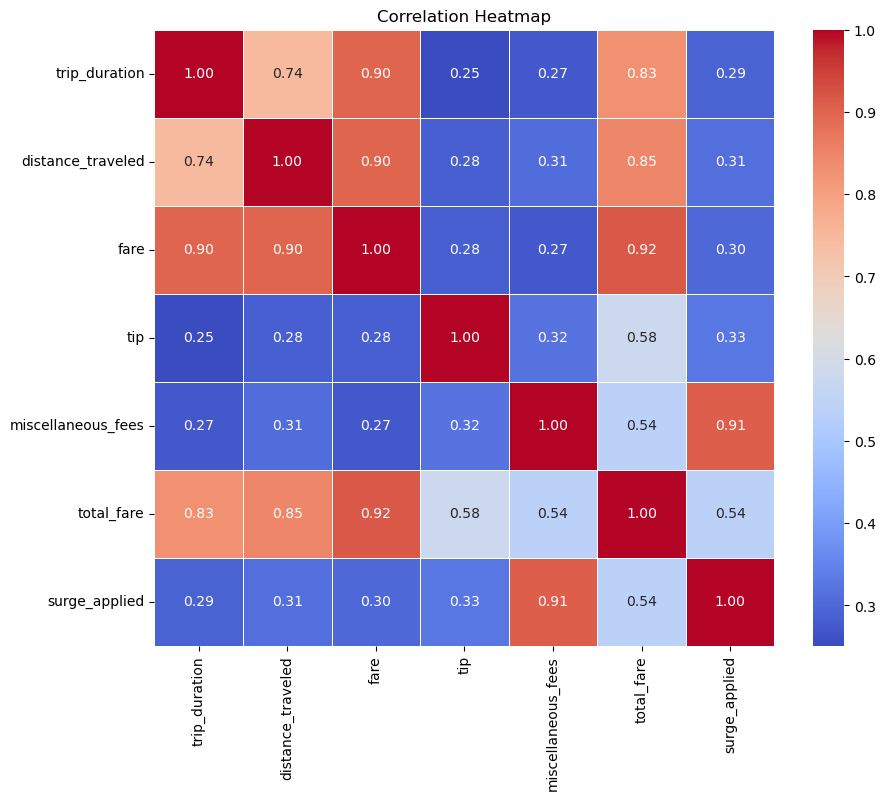

In [288]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [289]:
df = df.drop("miscellaneous_fees", axis=1)
df=df.reset_index(drop=True)

In [290]:
df

,trip_duration,distance_traveled,fare,tip,total_fare,surge_applied
0,748.0,2.75,75.00,24,105.300,0
1,1187.0,3.43,105.00,24,142.200,0
2,730.0,3.12,71.25,0,97.875,1
3,671.0,5.63,90.00,0,99.750,0
4,329.0,2.09,45.00,12,70.200,0
...,...,...,...,...,...,...
177523,354.0,1.24,45.00,0,51.000,0
177524,1617.0,8.42,150.00,47,202.800,0
177525,438.0,1.29,48.75,12,95.325,1
177526,571.0,2.82,63.75,0,69.750,0


In [291]:
# Select features (independent variables)
X = df[['trip_duration', 'distance_traveled', 'fare', 'tip', 'surge_applied']]

# Select target variable (dependent variable)
y = df['total_fare']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 15.55188340339189
R-squared: 0.9907342519237252
